## Getting Rid of Field Stars

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [1]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#read in phot file
photData = pd.read_csv('NGC6819.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
0,100210001,12.4646,13.0902,11.7091,99.9000,99.9000,99.900,99.9000,99.9000,10.684,...,-9.9000,-9.900,0.021,0.020,0.017,0.0,0.0,1,0.171,1
1,101310002,12.5085,13.0806,11.7925,99.9000,99.9000,99.900,99.9000,99.9000,10.843,...,-9.9000,-9.900,0.021,0.022,0.018,0.0,0.0,1,0.288,1
2,105390003,12.5621,13.1809,11.8130,13.3745,12.7150,12.310,12.0640,11.9320,10.804,...,-9.9000,-9.900,0.021,0.020,0.017,0.0,0.0,1,0.144,1
3,107260004,12.7564,13.3655,12.0148,13.5766,12.8780,12.484,12.2440,12.1328,11.009,...,-9.9000,0.010,0.020,0.019,0.018,0.0,0.0,1,0.016,1
4,104150005,12.7926,13.4132,12.0417,13.6380,13.0100,12.564,12.2790,12.1600,11.005,...,-9.9000,0.010,0.021,0.020,0.011,0.0,0.0,1,0.121,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,110101090,20.8973,21.3385,20.2262,21.8833,21.0819,20.483,20.3572,19.6902,99.900,...,0.0436,0.036,-9.900,-9.900,-9.900,0.0,0.0,1,1.000,1
1090,109591091,20.8980,99.9000,99.9000,99.9000,99.9000,99.900,99.9000,99.9000,99.900,...,-9.9000,-9.900,-9.900,-9.900,-9.900,0.0,0.0,1,1.000,1
1091,100191092,20.9383,20.5743,19.9693,99.9000,99.9000,99.900,99.9000,99.9000,99.900,...,-9.9000,-9.900,-9.900,-9.900,-9.900,0.0,0.0,1,1.000,1
1092,109191093,21.0079,21.0050,19.7970,99.9000,99.9000,99.900,99.9000,99.9000,99.900,...,-9.9000,-9.900,-9.900,-9.900,-9.900,0.0,0.0,1,1.000,1


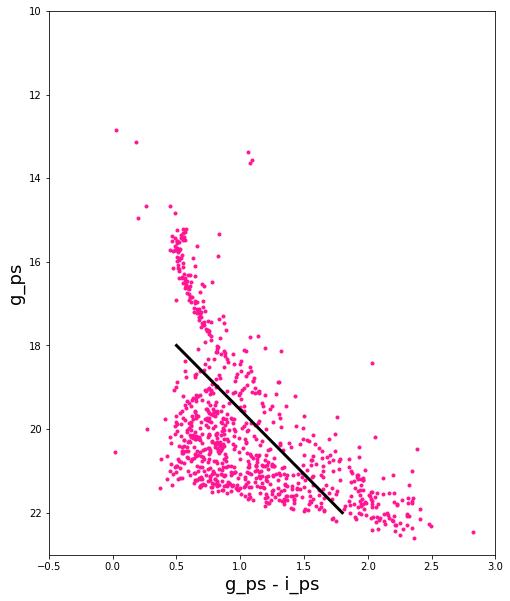

In [10]:
# plot CMD 
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0.5
x2=1.8
y1=18
y2=22
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [11]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 3.0769230769230766
The intercept for this line is 16.46153846153846


In [5]:
#copy this onto command line in gitbash with changed m and b values
#cat M35.phot | awk '{if (NR == 1 || $5 < m*($5 - $7) + b) print $0}' > M35.new.phot



#cat NGC6819.phot | awk '{if (NR == 1 || $5 < 3.077*($5 - $7) + 16.46) print $0}' > NGC6819.new.phot


In [12]:
#read in new phot file
newPhotData = pd.read_csv('NGC6819.new.phot',delim_whitespace=True)
df2 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

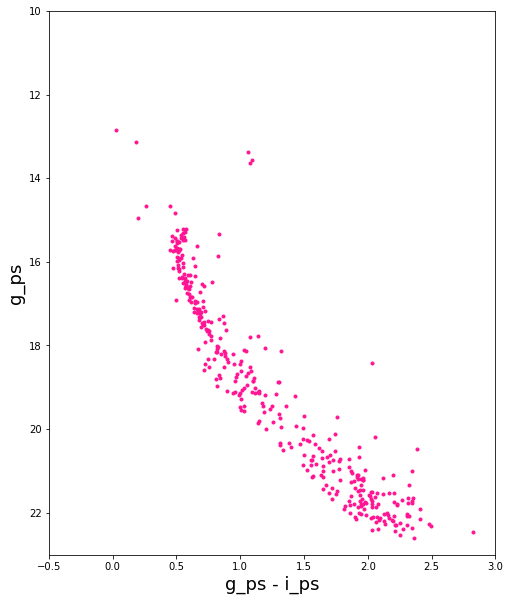

In [13]:
#plot new CMD
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df2['g_ps']-df2['i_ps'],df2['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)